In [ ]:
import pandas as pd
import matplotlib as plt

housing = pd.read_csv('AmesHousing.csv')
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [ ]:
#tạo list numerical, categorical
numerical = [
  'SalePrice', 'Lot Area', 'Overall Qual', 'Overall Cond', '1st Flr SF', '2nd Flr SF', 'Bedroom AbvGr'
]
categorical = [
  'MS Zoning', 'Lot Shape', 'Neighborhood', 'Central Air', 'Sale Condition', 'Mo Sold', 'Yr Sold'
]
#định dạng lại data housing chỉ chứa các biến của 2 list numerical, categorical
housing = housing[numerical + categorical]
housing.shape # cho biết data hiện giờ chỉ có 14 cột

(2930, 14)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0, 0.5, 'Count'), Text(0.5, 0, 'Sale Price')]

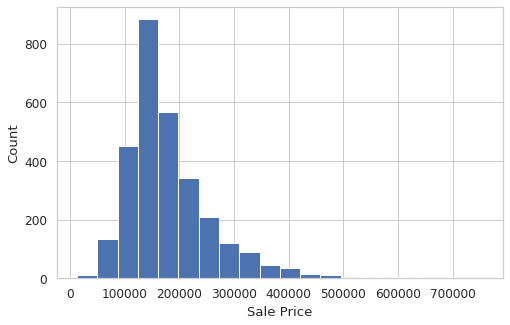

In [ ]:
import seaborn as sns

sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]}) # cài đặt kiểu, màu, cỡ chữ, kích thước hình
sns.distplot(
    housing['SalePrice'], norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}
).set(xlabel='Sale Price', ylabel='Count')
# từ biểu đồ, ta thấy rất ít ngôi nhà có giá dưới 100000, hầu hết những ngôi nhà có già từ 100000 đến 200000, và rất ít ngôi nhà được bán với giá trên 400000

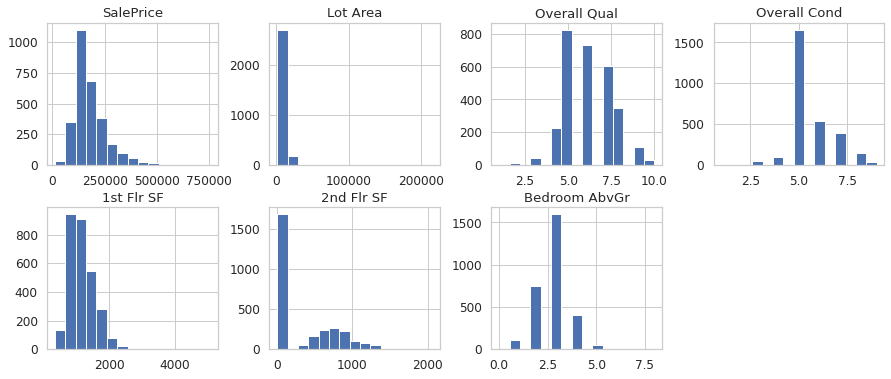

In [ ]:
housing[numerical].hist(bins=15, figsize=(15, 6), layout=(2, 4));
#diện tích của tầng một(1st flr SF) bị lệch rất nhiểu sang phải
#hầu hết các ngôi nhà không có tầng 2(2nd flr SF)
#hầu hết có 3 phòng ngủ (Bedroom abvGr)
#hầu hết các ngồi nhà đã được bán với overall qual là 5 và overall cond là 5 hoặc cao hơn

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


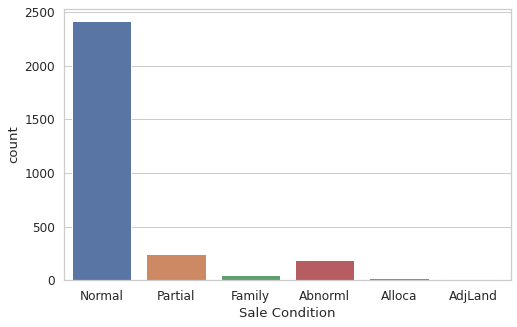

In [ ]:
sns.countplot(housing['Sale Condition']); 
#hầu hết các ngôi nhà được bán trong tình trạng bình thường, rất ít được bán trong tình trang adjland(mua đất liền kề), alloca(2 bất động sản liên kết với nhau bằng chứng từ riêng) và family(bán giữa các thành viên trong gia đình)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn

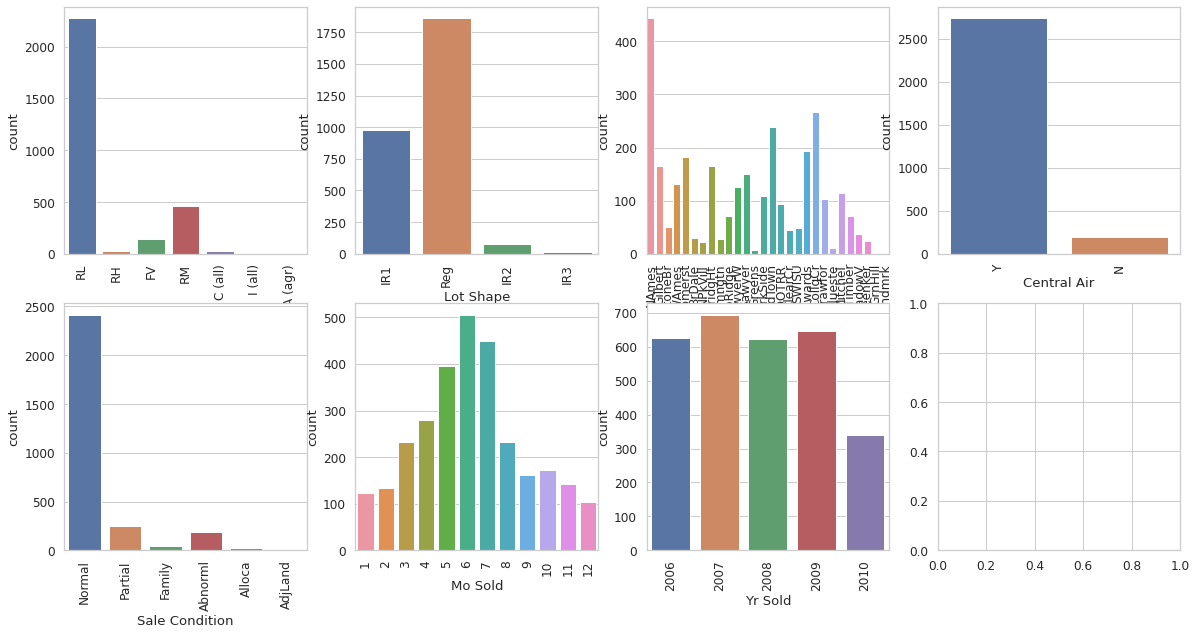

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2, 4, figsize=(20, 10)) # tạo một hifh gồm 2 hàng và 4 cột
for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(housing[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)
#hầu hết các ngôi nhà đều có phân loại phân vùng RL, có hình dạng lô đất thông thường và có CentralAir, những ngôi nhà thường được bán vào mùa hè(MoSold), được bán nhiều nhất ở khu vực NAmes(), và có sự sụt giảm số lượng bán vào năm 2010(Yr Sold)

In [ ]:
housing[housing['Yr Sold'] == 2010].groupby('Mo Sold')['Yr Sold'].count() #xem dữ liệu bán vào năm 2010

Mo Sold
1    26
2    26
3    48
4    72
5    79
6    82
7     8
Name: Yr Sold, dtype: int64

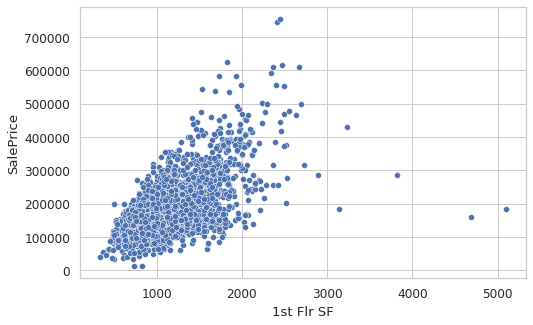

In [ ]:
sns.scatterplot(x=housing['1st Flr SF'], y=housing['SalePrice']); 
# từ biểu đồ phân tán , có thể thấy mối quan hệ cùng chiều giữa 1st Flr SF và saleprice. Tầng 1 của ngôi nhà càng lớn thì giá bán càng cao

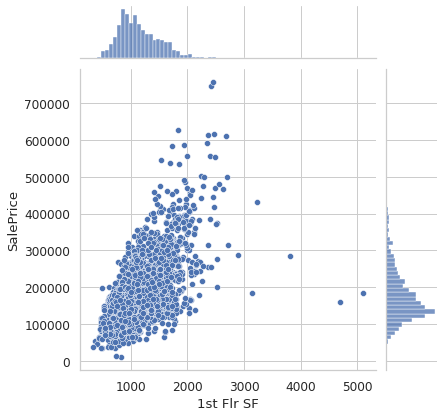

In [ ]:
sns.jointplot(x=housing['1st Flr SF'], y=housing['SalePrice']);
#biết được mối quan hệ giữa 2 biến, biết cách của từng biến được phân phối riêng lẻ

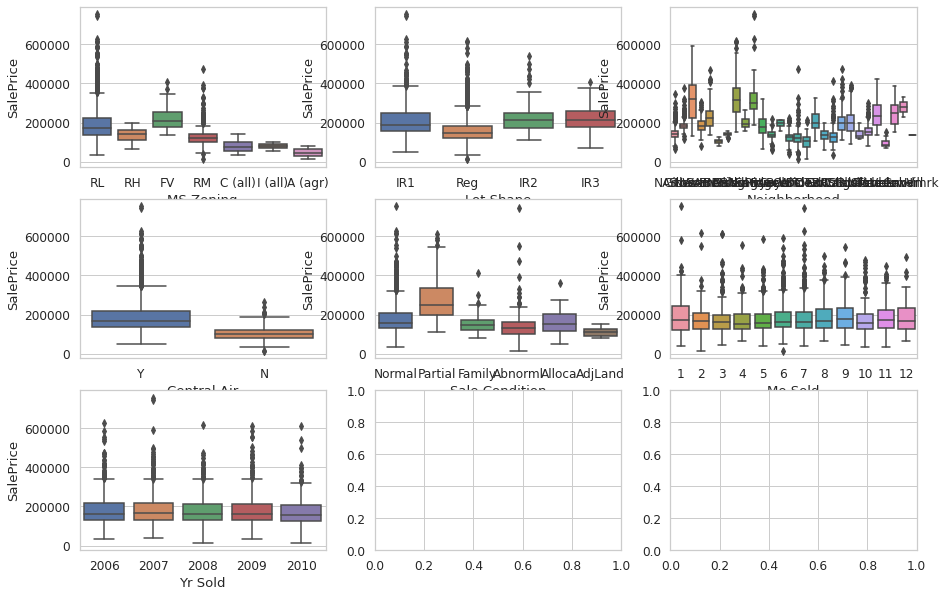

In [ ]:
fig, ax = plt.subplots(3, 3, figsize=(15, 10))
for var, subplot in zip(categorical, ax.flatten()):
    sns.boxplot(x=var, y='SalePrice', data=housing, ax=subplot)
#nhà ở phân khu FV có giá bán trung bình cao hơn các phân khu khác
#nhà có central Air, partical có điều kiện bán một phần(nhà chưa hoàn thành khi được đánh giá lần cuối)
#có ít sự khác biệt về giá bán giữa các ngôi nhà có lotShapes, hoặc giữa MoSold và YrSold

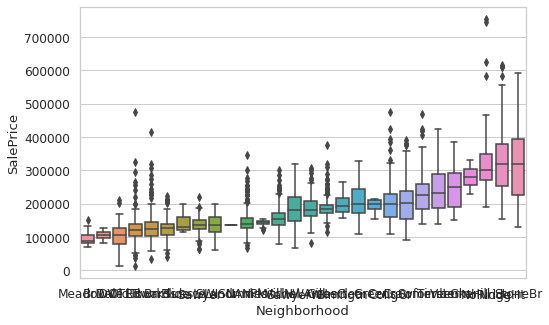

In [ ]:

sorted_nb = housing.groupby(['Neighborhood'])['SalePrice'].median().sort_values() #sắp xếp các vùng lân cận theo giá trung bình và lưu trong sorted_nb
sns.boxplot(x=housing['Neighborhood'], y=housing['SalePrice'], order=list(sorted_nb.index))
#ở những con phố rẻ nhất, nhà đc bán với giá trung bình khoảng 100000, ở những khu phố đắt nhất, nhà đc bán với giá khoảng 300000. đối với một số vùng lân cận, sự phân tán giữa các mức giá là rất thấp, nghĩa là tất cả các mức giá đều gần nhau. trong khu phố đắt đỏ nhất NridgHt, có sự phân tán lớn trong việc phân bổ giá

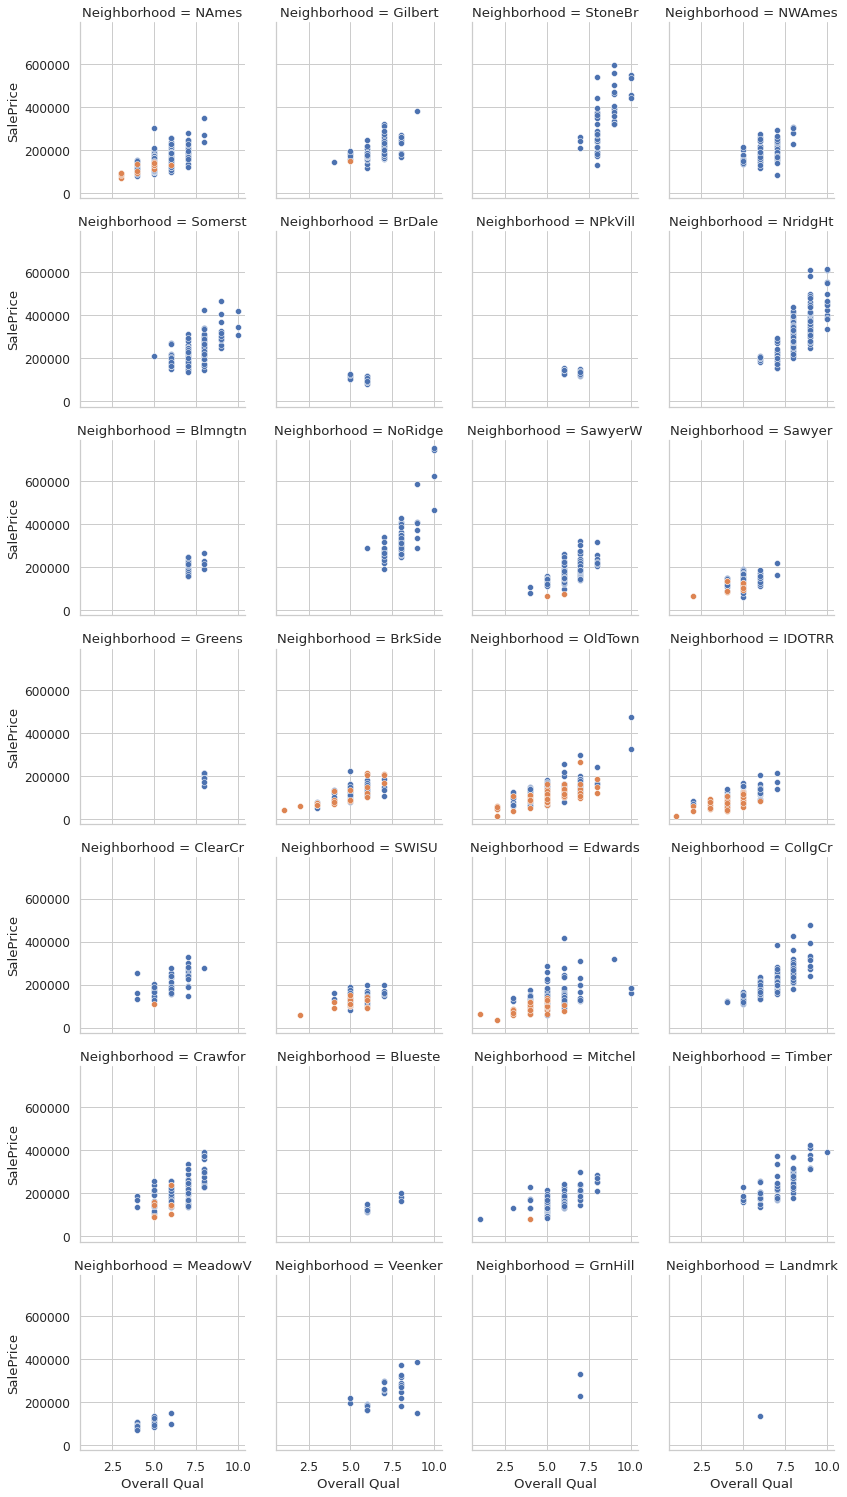

In [ ]:
cond_plot = sns.FacetGrid(data=housing, col='Neighborhood', hue='Central Air', col_wrap=4)
cond_plot.map(sns.scatterplot, 'Overall Qual', 'SalePrice');
#Đối với mỗi vùng lân cận, chúng ta có thể thấy mối quan hệ giữa Tổng thể và Giá bán.
#Chúng tôi cũng đã thêm một biến phân loại khác CentralAir vào tham số màu (tùy chọn) - các điểm màu cam tương ứng với các ngôi nhà không có CentralAir. Như bạn thấy, những ngôi nhà này có xu hướng bán với giá thấp hơn.
#Phương pháp FacetGrid giúp bạn dễ dàng tạo ra các hình ảnh trực quan phức tạp và nhận được thông tin có giá trị. Thực hành tốt là tạo ra những hình ảnh trực quan này để có được những hiểu biết nhanh chóng về các mối quan hệ biến đổi.